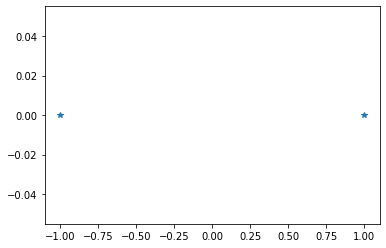

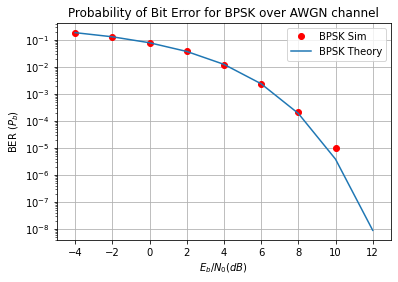

In [1]:
#Eb/N0 Vs BER for BPSK over AWGN (complex baseband model)
# © Author: Mathuranathan Viswanathan (gaussianwaves.com)
import numpy as np #for numerical computing
import matplotlib.pyplot as plt #for plotting functions
from scipy.special import erfc #erfc/Q function

#---------Input Fields------------------------
nSym = 10**5 # Number of symbols to transmit
EbN0dBs = np.arange(start=-4,stop = 13, step = 2) # Eb/N0 range in dB for simulation
BER_sim = np.zeros(len(EbN0dBs)) # simulated Bit error rates

M=2 #Number of points in BPSK constellation
m = np.arange(0,M) #all possible input symbols
A = 1; #amplitude
constellation = A*np.cos(m/M*2*np.pi)  #reference constellation for BPSK

#------------ Transmitter---------------
inputSyms = np.random.randint(low=0, high = M, size=nSym) #Random 1's and 0's as input to BPSK modulator
s = constellation[inputSyms] #modulated symbols

fig, ax1 = plt.subplots(nrows=1,ncols = 1)
ax1.plot(np.real(constellation),np.imag(constellation),'*')

#----------- Channel --------------
#Compute power in modulatedSyms and add AWGN noise for given SNRs
for j,EbN0dB in enumerate(EbN0dBs):
    gamma = 10**(EbN0dB/10) #SNRs to linear scale
    P=sum(abs(s)**2)/len(s) #Actual power in the vector
    N0=P/gamma # Find the noise spectral density
    n = np.sqrt(N0/2)*np.random.standard_normal(s.shape) # computed noise vector
    r = s + n # received signal
    
    #-------------- Receiver ------------
    detectedSyms = (r <= 0).astype(int) #thresolding at value 0
    BER_sim[j] = np.sum(detectedSyms != inputSyms)/nSym #calculate BER

BER_theory = 0.5*erfc(np.sqrt(10**(EbN0dBs/10)))

fig, ax = plt.subplots(nrows=1,ncols = 1)
ax.semilogy(EbN0dBs,BER_sim,color='r',marker='o',linestyle='',label='BPSK Sim')
ax.semilogy(EbN0dBs,BER_theory,marker='',linestyle='-',label='BPSK Theory')
ax.set_xlabel('$E_b/N_0(dB)$');ax.set_ylabel('BER ($P_b$)')
ax.set_title('Probability of Bit Error for BPSK over AWGN channel')
ax.set_xlim(-5,13);ax.grid(True);
ax.legend();plt.show()

EbNodB: 0
Error bits: 393172
Error probability: 0.0786344
EbNodB: 1
Error bits: 281735
Error probability: 0.056347
EbNodB: 2
Error bits: 187723
Error probability: 0.0375446
EbNodB: 3
Error bits: 114660
Error probability: 0.022932
EbNodB: 4
Error bits: 62462
Error probability: 0.0124924
EbNodB: 5
Error bits: 29653
Error probability: 0.0059306
EbNodB: 6
Error bits: 12019
Error probability: 0.0024038
EbNodB: 7
Error bits: 4007
Error probability: 0.0008014
EbNodB: 8
Error bits: 940
Error probability: 0.000188
EbNodB: 9
Error bits: 174
Error probability: 3.48e-05
EbNodB: 10
Error bits: 21
Error probability: 4.2e-06


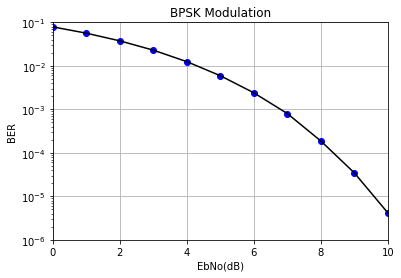

In [2]:
from numpy import sqrt
from numpy.random import rand, randn
import matplotlib.pyplot as plt

N = 5000000
EbNodB_range = range(0, 11)
itr = len(EbNodB_range)
ber = [None]*itr

for n in range(0, itr):

    EbNodB = EbNodB_range[n]
    EbNo = 10.0**(EbNodB/10.0)
    x = 2 * (rand(N) >= 0.5) - 1
    noise_std = 1/sqrt(2*EbNo)
    y = x + noise_std * randn(N)
    y_d = 2 * (y >= 0) - 1
    errors = (x != y_d).sum()
    ber[n] = 1.0 * errors / N

    print ("EbNodB:", EbNodB)
    print ("Error bits:", errors)
    print ("Error probability:", ber[n])

plt.plot(EbNodB_range, ber, 'bo', EbNodB_range, ber, 'k')
plt.axis([0, 10, 1e-6, 0.1])
plt.xscale('linear')
plt.yscale('log')
plt.xlabel('EbNo(dB)')
plt.ylabel('BER')
plt.grid(True)
plt.title('BPSK Modulation')
plt.show()
